In [1]:
cd /Users/zacklarsen/Desktop/CSC 478/HW/HW #3/communities

/Users/zacklarsen/Desktop/CSC 478/HW/HW #3/communities


In [2]:
import numpy as np
from numpy import linalg as la
import pandas as pd
from sklearn import feature_selection
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import pylab as pl

# 1a	
    Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn. The provided data is already normalized (see description), so there is no need for additional normalization. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. Separate the target attribute for regression.


In [3]:
crime = pd.read_csv('communities.csv',na_values=["?"])
crimeDF = pd.DataFrame(crime)
crimeDF.shape

(1994, 100)

In [4]:
crimeDF[crimeDF.OtherPerCap.isnull()].shape

(1, 100)

In [5]:
percapmean = crimeDF.OtherPerCap.mean()

In [6]:
crimeDF.OtherPerCap.fillna(percapmean,axis=0,inplace=True)

In [7]:
crimeDF.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
state,1994,NaN,NaN,NaN,28.6836,16.3976,1,12,34,42,56
communityname,1994,1828,Jacksonvillecity,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population,1994,NaN,NaN,NaN,0.0575928,0.126906,0,0.01,0.02,0.05,1
householdsize,1994,NaN,NaN,NaN,0.463395,0.163717,0,0.35,0.44,0.54,1
racepctblack,1994,NaN,NaN,NaN,0.179629,0.253442,0,0.02,0.06,0.23,1
racePctWhite,1994,NaN,NaN,NaN,0.753716,0.244039,0,0.63,0.85,0.94,1
racePctAsian,1994,NaN,NaN,NaN,0.153681,0.208877,0,0.04,0.07,0.17,1
racePctHisp,1994,NaN,NaN,NaN,0.144022,0.232492,0,0.01,0.04,0.16,1
agePct12t21,1994,NaN,NaN,NaN,0.424218,0.155196,0,0.34,0.4,0.47,1
agePct12t29,1994,NaN,NaN,NaN,0.493867,0.143564,0,0.41,0.48,0.54,1


In [8]:
target = pd.DataFrame(crimeDF["ViolentCrimesPerPop"])
target.head(5)

,ViolentCrimesPerPop
0,0.20
1,0.67
2,0.43
3,0.12
4,0.03


In [9]:
crimeDF.columns.values  #Find the column names

array(['state', 'communityname', 'population', 'householdsize',
       'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp',
       'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up',
       'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf',
       'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire',
       'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad',
       'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
       'PctEmplProfServ', 'MalePctDivorce', 'MalePctNevMarr',
       'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
       'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par',
       'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg',
       'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8',
       'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmi

In [10]:
crimeDF.drop('ViolentCrimesPerPop', axis=1, inplace=True)   #Separating the target attribute
crimeDF.drop('state', axis=1, inplace=True)   #Removing the state attribute
crimeDF.drop('communityname', axis=1, inplace=True)   #Removing the community name attribute

In [11]:
crimeDF[crimeDF.OtherPerCap.isnull()]

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans


#We can write the new crimeDF to a .csv file, import it back in as a numpy array, and continue with the matrix multiplications

In [12]:
crimeDF.to_csv('community_clean.csv',index=False)

# 1b

    Perform standard linear regression on data using the implementation for Ch. 8 of MLA. Compute the RMSE value on the full training data. In this case, the "full training data" means the full dataset. Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights). Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you may use the KFold module from sklearn.cross_validation).


In [13]:
#Read in the data set that we cleaned with pandas above, 
#but as a numpy array so that we can safely do matrix multiplication with it.
from numpy import genfromtxt
crime_clean = genfromtxt('community_clean.csv', delimiter=',',names=True)

In [14]:
crime_clean

array([ (0.19, 0.33, 0.02, 0.9, 0.12, 0.17, 0.34, 0.47, 0.29, 0.32, 0.2, 1.0, 0.37, 0.72, 0.34, 0.6, 0.29, 0.15, 0.43, 0.39, 0.4, 0.39, 0.32, 0.27, 0.27, 0.36, 0.41, 0.08, 0.19, 0.1, 0.18, 0.48, 0.27, 0.68, 0.23, 0.41, 0.68, 0.4, 0.75, 0.75, 0.35, 0.55, 0.59, 0.61, 0.56, 0.74, 0.76, 0.04, 0.14, 0.03, 0.24, 0.27, 0.37, 0.39, 0.07, 0.07, 0.08, 0.08, 0.89, 0.06, 0.14, 0.13, 0.33, 0.39, 0.28, 0.55, 0.09, 0.51, 0.5, 0.21, 0.71, 0.52, 0.05, 0.26, 0.65, 0.14, 0.06, 0.22, 0.19, 0.18, 0.36, 0.35, 0.38, 0.34, 0.38, 0.46, 0.25, 0.04, 0.0, 0.12, 0.42, 0.5, 0.51, 0.64, 0.12, 0.26, 0.2),
       (0.0, 0.16, 0.12, 0.74, 0.45, 0.07, 0.26, 0.59, 0.35, 0.27, 0.02, 1.0, 0.31, 0.72, 0.11, 0.45, 0.25, 0.29, 0.39, 0.29, 0.37, 0.38, 0.33, 0.16, 0.3, 0.22, 0.35, 0.01, 0.24, 0.14, 0.24, 0.3, 0.27, 0.73, 0.57, 0.15, 1.0, 0.63, 0.91, 1.0, 0.29, 0.43, 0.47, 0.6, 0.39, 0.46, 0.53, 0.0, 0.24, 0.01, 0.52, 0.62, 0.64, 0.63, 0.25, 0.27, 0.25, 0.23, 0.84, 0.1, 0.16, 0.1, 0.17, 0.29, 0.17, 0.26, 0.2, 0.82, 0.0, 0.02, 0.7

In [15]:
crime_clean['population']

array([ 0.19,  0.  ,  0.  , ...,  0.16,  0.08,  0.2 ])

In [16]:
target.head(10)

,ViolentCrimesPerPop
0,0.20
1,0.67
2,0.43
3,0.12
4,0.03
5,0.14
6,0.03
7,0.55
8,0.53
9,0.15


In [17]:
len(crime_clean)

1994

In [18]:
#The code below allow us to concatenate the crime_clean data with a column of ones. I was getting an error before
#when I tried to concatenate using the example from class

a = []
for row in crime_clean:
    b = []
    for i in row:
        b.append(i)
    a.append(b)

b = int(np.array(1))
x = np.array([np.hstack((a[i],b)) for i in range(len(crime_clean))])
x[x == -np.inf] = 0 #To get rid of any inf values
x[x == np.inf] = 0
print x
print x.shape

[[ 0.19  0.33  0.02 ...,  0.26  0.2   1.  ]
 [ 0.    0.16  0.12 ...,  0.12  0.45  1.  ]
 [ 0.    0.42  0.49 ...,  0.21  0.02  1.  ]
 ..., 
 [ 0.16  0.37  0.25 ...,  0.32  0.18  1.  ]
 [ 0.08  0.51  0.06 ...,  0.38  0.33  1.  ]
 [ 0.2   0.78  0.14 ...,  0.3   0.05  1.  ]]
(1994, 98)


In [19]:
y = np.array(target)
print y[:10]
print y.shape

[[ 0.2 ]
 [ 0.67]
 [ 0.43]
 [ 0.12]
 [ 0.03]
 [ 0.14]
 [ 0.03]
 [ 0.55]
 [ 0.53]
 [ 0.15]]
(1994, 1)


In [20]:
#From MLIA ch. 8        Be careful - the inputs should both be numpy arrays, not a dataframe or other object
def standRegres(xArr,yArr):
    xMat = np.matrix(xArr); yMat = np.matrix(yArr).T
    xTx = xMat.T*xMat
    xTx = np.nan_to_num(xTx)
    if la.det(xTx) == 0.0:
        print "This matrix is singular, cannot do inverse"
        return
    ws = xTx.I * (xMat.T*yMat.T)
    return ws

In [21]:
ws = standRegres(x,y)
print ws

[[  1.31108068e-01]
 [ -3.14114977e-02]
 [  2.09909670e-01]
 [ -4.05351612e-02]
 [ -1.38892919e-02]
 [  5.89726825e-02]
 [  1.23399025e-01]
 [ -2.22621600e-01]
 [ -1.47500199e-01]
 [  5.01635477e-02]
 [ -2.42413829e-01]
 [  4.64024392e-02]
 [ -1.96945615e-01]
 [ -2.06117500e-01]
 [  4.65935490e-02]
 [ -1.77212915e-01]
 [  6.30148504e-02]
 [  1.14942190e-02]
 [ -9.08951848e-02]
 [  2.74640044e-01]
 [  1.01752476e-01]
 [ -3.31517562e-01]
 [ -2.91799268e-02]
 [ -3.54483393e-02]
 [  2.26173855e-02]
 [  4.30950137e-02]
 [  3.44408548e-02]
 [  1.28412458e-01]
 [ -1.91293360e-01]
 [ -1.00769002e-01]
 [  6.46856092e-02]
 [  1.06062117e-01]
 [  2.44126006e-06]
 [  2.34984611e-01]
 [ -3.75705330e-02]
 [ -7.74957660e-03]
 [  4.66779619e-01]
 [  2.26295907e-01]
 [  1.74621953e-01]
 [ -5.75206227e-01]
 [ -1.41954207e-01]
 [  5.68782538e-02]
 [ -3.51066745e-01]
 [ -3.49493414e-02]
 [  4.63705978e-04]
 [  5.57016681e-02]
 [ -1.82238360e-01]
 [ -1.54646442e-01]
 [  1.26172899e-01]
 [ -1.44320569e-01]


In [22]:
#Now that we have the regression coefficients, we can compute the predicted values:
xMat=np.mat(x)
yHat = xMat*ws
print yHat

[[ 0.16551838]
 [ 0.29062973]
 [ 0.38367799]
 ..., 
 [ 0.40142767]
 [ 0.16882645]
 [ 0.37326947]]


Compute the RMSE value on the full training data

In [23]:
# Compute RMSE on training data
p = yHat   
#Here, ws is the result of the standRegres function we created above

# Now we can constuct a vector of errors
err = abs(p-y)

# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err.T,err)

# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print rmse_train

[[ 0.12888961]]


Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights). 

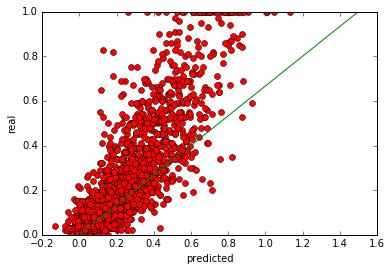

In [24]:
# Plot outputs
%matplotlib inline
pl.plot(p, y,'ro')
pl.plot([0,1.5],[0,1], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you may use the KFold module from sklearn.cross_validation).

In [25]:
# Create linear regression object
linreg = LinearRegression()

In [26]:
# Now let's compute RMSE using 10-fold x-validation
kf = KFold(len(x), n_folds=10)
xval_err = 0
for train,test in kf:
    linreg.fit(x[train],y[train])
    # p = np.array([linreg.predict(xi) for xi in x[test]])
    p = linreg.predict(x[test])
    e = p-y[test]
    xval_err += np.dot(e.T,e)
    
rmse_10cv = np.sqrt(xval_err/len(x))

In [27]:
rmse_10cv

array([[ 0.13633308]])

# The RMSE on the full training data was 0.1288, and the RMSE using cross-validation on the test data is 0.13633.

c	Feature Selection:  use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data, target attribute; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. Show the list of most informative variables and their weights [Note: since this is regression not classification, you should use feature_selection.f_regression as scoring function rather than chi2). Next, plot the model's mean absolute error values  on cross-validation relative to the percentage of selected features (See scikit-learn's metrics.mean_absolute_error). In order to use cross_validation.cross_val_score with regression you'll need to pass to it scoring='mean_absolute_error' as a parameter. [Hint: for an example of a similar feature selection process please review the class example notebook. Also, review scikit-learn documentation for feature selection.]


Note that when using mean absolute error, you need to calculate the absolute value to make sure you are not returning a negative value

In [28]:
from sklearn import feature_selection

In [29]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor

In [37]:
crime = pd.read_csv("community_clean.csv")
crimeDF = pd.DataFrame(crime)
crimeDF = np.array(crimeDF)
# define the data and target attribute
# In order to do multiple regression we need to add a column of 1s for x0
x = np.array([np.concatenate((v,[1])) for v in crimeDF])
y = np.array(target)
print x
print y

[[ 0.19  0.33  0.02 ...,  0.26  0.2   1.  ]
 [ 0.    0.16  0.12 ...,  0.12  0.45  1.  ]
 [ 0.    0.42  0.49 ...,  0.21  0.02  1.  ]
 ..., 
 [ 0.16  0.37  0.25 ...,  0.32  0.18  1.  ]
 [ 0.08  0.51  0.06 ...,  0.38  0.33  1.  ]
 [ 0.2   0.78  0.14 ...,  0.3   0.05  1.  ]]
[[ 0.2 ]
 [ 0.67]
 [ 0.43]
 ..., 
 [ 0.23]
 [ 0.19]
 [ 0.48]]


In [38]:
#20/80 split:
from sklearn.cross_validation import train_test_split, KFold
from sklearn.cross_validation import KFold
from sklearn import feature_selection, cross_validation
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [39]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(1595, 98)
(1595, 1)
(399, 98)
(399, 1)


In [40]:
#Create a pandas dataframe so we can access the column names later
import pandas as pd
PDX = pd.DataFrame(X_train)
PDY = pd.DataFrame(y_train)

In [41]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression,percentile=30)

In [42]:
X_train_fs = fs.fit(X_train,y_train)

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
print fs.get_support()

[ True False  True  True False False False False False False  True False
  True False False  True False  True False  True False False False False
 False False False  True  True  True  True False  True False False False
  True False  True  True False  True  True  True  True False False  True
  True False False False False False False False False False False False
 False False False False False  True  True  True False  True False  True
  True False False  True False False False False False False False False
 False False False  True False False False False False False False False
 False False]


In [44]:
print fs.scores_

[  2.56032355e+02   3.49251942e+00   1.07488951e+03   1.41250781e+03
   1.95959063e+00   1.37540432e+02   4.89480353e+00   3.73340150e+01
   1.58750556e+01   8.24793841e+00   2.47776139e+02   1.10608958e+01
   3.41632538e+02   1.61570751e+02   4.03442203e+01   7.56014972e+02
   2.24863791e+01   7.84570641e+02   1.39756238e+01   3.66900422e+02
   2.14993158e+02   6.54462345e+01   1.26577099e+02   1.23170954e+01
   2.90692271e+01   3.33693026e+01   9.23657068e+01   4.00307857e+02
   5.78817365e+02   3.19218108e+02   4.72196208e+02   1.73366843e+02
   5.33913152e+02   1.90465262e+02   2.60580582e+00   7.39907499e+00
   6.02774894e+02   1.61078423e+02   7.04772739e+02   6.93137830e+02
   2.44680622e+01   1.65786502e+03   1.97280406e+03   1.34217361e+03
   1.29953511e+03   1.31323115e+00   3.64964319e+01   4.31635560e+02
   1.93612087e+03   1.51623323e+02   4.06514113e+01   7.02276361e+01
   9.62774849e+01   1.34794362e+02   8.51961043e+01   1.01535682e+02
   1.06973090e+02   1.16901815e+02

In [45]:
PDX.columns.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97])

In [46]:
print PDX.columns[fs.get_support()].values   #This shows us the most import subset of features in PDX

[ 0  2  3 10 12 15 17 19 27 28 29 30 32 36 38 39 41 42 43 44 47 48 65 66 67
 69 71 72 75 87]


In [47]:
for i in range(len(PDX.columns.values)):
    if fs.get_support()[i]:
        print PDX.columns.values[i],'\t',fs.scores_[i]

0 	256.032354737
2 	1074.88950927
3 	1412.50781239
10 	247.776138548
12 	341.632537523
15 	756.014972331
17 	784.570640809
19 	366.900421844
27 	400.307856891
28 	578.817365214
29 	319.218108102
30 	472.196207869
32 	533.913152199
36 	602.774893582
38 	704.772739005
39 	693.137830382
41 	1657.865017
42 	1972.80406387
43 	1342.17361379
44 	1299.53510584
47 	431.635560269
48 	1936.12087378
65 	630.760339374
66 	375.645901876
67 	487.961680842
69 	339.968618162
71 	478.530429718
72 	507.636408542
75 	505.862652747
87 	265.845941875


In [48]:
linreg = LinearRegression()

In [49]:

def optimus_PCT(X_train,y_train,percentiles,k,model):
    
    PDX = pd.DataFrame(X_train)
    
    results = []
    
    for i in percentiles:
        fs = feature_selection.SelectPercentile(feature_selection.f_regression,percentile=i)
        X_train_fs = fs.fit(X_train,y_train)
        scores = cross_validation.cross_val_score(model,X_train_fs,y_train,scoring='mean_absolute_error',cv=k)
        print i,scores.mean()
        results = np.append(results,scores.mean())
    
    optimal_percentile = np.where(results == results.max())[0]
    print "Optimal percentile of features:{0}".format(percentiles[optimal_percentile]),"\n"
    optimal_number_of_features = int(floor(percentiles[optimal_percentile]*len(PDX.columns)/100))
    print "Optimal number of features:{0}".format(optimal_num_features),"\n"
    
    #Plotting the model's mean absolute error values on 
    #cross-validation relative to the percentage of selected features
    
    pl.figure()
    pl.xlabel("Percentage of features selected")
    pl.ylabel("Cross validation accuracy")
    pl.plot(percentiles, results)
    

In [53]:
new_y_train = np.ravel(y_train.T[0])
new_y_train = new_y_train.astype(int)

In [54]:
optimus_PCT(X_train,new_y_train,range(1,100,5),5,linreg)

TypeError: Singleton array array(SelectPercentile(percentile=1,
         score_func=<function f_regression at 0x11546aed8>), dtype=object) cannot be considered a valid collection.

# 1c feature selection, with boston data

# This is using boston dataset because there was an error with the communities dataset. I have since fixed the error in communities die to the missing values but I have not had time to replace the code below.



In [55]:
from sklearn.datasets import load_boston      
boston = load_boston()
# In order to do multiple regression we need to add a column of 1s for x0
x = np.array([np.concatenate((v,[1])) for v in boston.data])
y = boston.target

#Creating 80% train and 20% test splits
#20/80 split:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [56]:
#Create a pandas dataframe so we can access the column names later
import pandas as pd
PDX = pd.DataFrame(X_train)
PDY = pd.DataFrame(y_train)

In [57]:
PDX.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.44178,0.0,6.20,0.0,0.504,6.552,21.4,3.3751,8.0,307.0,17.4,380.34,3.76,1.0
1,0.05372,0.0,13.92,0.0,0.437,6.549,51.0,5.9604,4.0,289.0,16.0,392.85,7.39,1.0


In [58]:
PDY.head(4)

,0
0,31.5
1,27.1
2,8.3
3,13.6


# 1c
For feature selection, write a script or function that takes as input the training data, target attribute,the model,and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross validation (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables and their weights.

Note: since this is regression, not classification, you should use feature_selection.f_regression as the scoring function rather than chi2

In [59]:
from sklearn import feature_selection, cross_validation

In [60]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression,percentile=30)

In [61]:
X_train_fs = fs.fit(X_train,y_train)

In [62]:
print fs.get_support()

[False False  True False False  True False False False False  True False
  True False]


In [63]:
print fs.scores_

[  59.78190161   48.78169908  111.89434054    8.26785431   72.96366952
  385.40551953   53.4814097    18.63075226   49.4664602    97.01135422
  131.04178447   46.10694297  478.72258955           nan]


In [64]:
PDX.columns.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [65]:
print PDX.columns[fs.get_support()].values   #This shows us the most import subset of features in PDX

[ 2  5 10 12]


In [67]:
for i in range(len(PDX.columns.values)):
    if fs.get_support()[i]:
        print PDX.columns.values[i],'\t',fs.scores_[i]

2 	111.894340538
5 	385.405519526
10 	131.041784473
12 	478.722589553


In [68]:
import pandas as pd
import pylab as pl
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [69]:

def optimus_PCT(X_train,y_train,percentiles,k,model):
    
    PDX = pd.DataFrame(X_train)
    
    results = []
    
    for i in percentiles:
        fs = feature_selection.SelectPercentile(feature_selection.f_regression,percentile=i)
        X_train_fs = fs.fit(X_train,y_train)
        scores = cross_validation.cross_val_score(model,X_train_fs,y_train,scoring='mean_absolute_error',cv=k)
        print i,scores.mean()
        results = np.append(results,scores.mean())
    
    optimal_percentile = np.where(results == results.max())[0]
    print "Optimal percentile of features:{0}".format(percentiles[optimal_percentile]),"\n"
    optimal_number_of_features = int(floor(percentiles[optimal_percentile]*len(PDX.columns)/100))
    print "Optimal number of features:{0}".format(optimal_num_features),"\n"
    
    #Plotting the model's mean absolute error values on 
    #cross-validation relative to the percentage of selected features
    
    pl.figure()
    pl.xlabel("Percentage of features selected")
    pl.ylabel("Cross validation accuracy")
    pl.plot(percentiles, results)
    
     

In [72]:
optimus_PCT(X_train,y_train,range(1,100,5),5,linreg)

TypeError: Singleton array array(SelectPercentile(percentile=1,
         score_func=<function f_regression at 0x11546aed8>), dtype=object) cannot be considered a valid collection.

# 1d

    Next, perform Ridge Regression and Lasso Regression, however this time use the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha parameter. First, create a 20%-80% randomized split of the data. Set aside the test portion; the model selection process should be performed using the 80% training data partition. 

In [73]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor

In [74]:
from sklearn.datasets import load_boston      
#This is play data to build the function. We will replace with the data from above later.
boston = load_boston()
# In order to do multiple regression we need to add a column of 1s for x0
x = np.array([np.concatenate((v,[1])) for v in boston.data])
y = boston.target

In [75]:
#Creating 80% train and 20% test splits
#20/80 split:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [76]:
print X_train,y_train

[[  4.41780000e-01   0.00000000e+00   6.20000000e+00 ...,   3.80340000e+02
    3.76000000e+00   1.00000000e+00]
 [  5.37200000e-02   0.00000000e+00   1.39200000e+01 ...,   3.92850000e+02
    7.39000000e+00   1.00000000e+00]
 [  1.58603000e+01   0.00000000e+00   1.81000000e+01 ...,   7.68000000e+00
    2.43900000e+01   1.00000000e+00]
 ..., 
 [  4.56000000e-02   0.00000000e+00   1.38900000e+01 ...,   3.92800000e+02
    1.35100000e+01   1.00000000e+00]
 [  5.29305000e+00   0.00000000e+00   1.81000000e+01 ...,   3.78380000e+02
    1.87600000e+01   1.00000000e+00]
 [  1.25179000e+00   0.00000000e+00   8.14000000e+00 ...,   3.76570000e+02
    2.10200000e+01   1.00000000e+00]] [ 31.5  27.1   8.3  13.6   8.8  22.5   7.5  28.6  50.   11.5  13.5  24.4
  36.2  21.4  18.5  22.6  24.8  19.3  29.8  16.4   8.4  24.7  20.1  13.1
  35.2  33.8  20.3  10.2  22.   21.2  24.2  29.   22.7  21.8  34.9  25.2
  20.9  19.4  20.   14.   30.1  33.1  20.6  22.6  33.4  20.1  10.5  15.6
  16.8  22.6  34.6  19.8  17

# 1d 

    You should create a function that takes as input the data and target attribute; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). 


You should also plot the error values on the training and cross-validation splits across the specified values of the alpha parameter.



In [77]:
# Plot outputs
%matplotlib inline

def alpha_hunter(X_train,y_train,alpha,model,k): 

    t_rmse = np.array([])
    cv_rmse = np.array([])
    print('{}\t {}\t {}'.format("alpha","rmse_train","rmse_kcv"))


    for a in alpha:
        ridge = model(fit_intercept=True,alpha=a)
        ridge.fit(X_train,y_train)
        p = ridge.predict(X_train)
        err = p-y_train
        total_error = np.dot(err,err)
        rmse_train = np.sqrt(total_error/len(p))
        
        
        #k-fold cross-validation
        kf = KFold(len(X_train),n_folds=k)
        xval_err = 0
        for train,test in kf:
            ridge.fit(X_train[train],y_train[train])
            p = ridge.predict(X_train[test])
            e = p-y_train[test]
            xval_err += np.dot(e,e)
            
        rmse_kcv = np.sqrt(xval_err/len(X_train))
        t_rmse = np.append(t_rmse, [rmse_train])
        cv_rmse = np.append(cv_rmse, [rmse_kcv])
        print('{:.3f}\t {:.4f}\t \t  {:.4f}'.format(a,rmse_train,rmse_kcv))
    print "The best rmse achieved was:" ,min(cv_rmse)
    
    pl.plot(alpha, t_rmse, label='RMSE-Train')
    pl.plot(alpha, cv_rmse, label='RMSE_XVal')
    pl.legend( ('RMSE-Train', 'RMSE_XVal') )
    pl.ylabel('RMSE')
    pl.xlabel('Alpha')
    pl.show()

alpha	 rmse_train	 rmse_kcv
0.010	 4.7051	 	  5.0381
0.418	 4.7102	 	  5.0333
0.826	 4.7177	 	  5.0366
1.234	 4.7245	 	  5.0403
1.642	 4.7302	 	  5.0434
2.050	 4.7349	 	  5.0459
2.458	 4.7390	 	  5.0477
2.866	 4.7424	 	  5.0492
3.274	 4.7454	 	  5.0503
3.682	 4.7481	 	  5.0513
4.090	 4.7504	 	  5.0520
4.498	 4.7525	 	  5.0526
4.906	 4.7544	 	  5.0531
5.313	 4.7562	 	  5.0535
5.721	 4.7578	 	  5.0538
6.129	 4.7593	 	  5.0541
6.537	 4.7608	 	  5.0544
6.945	 4.7621	 	  5.0547
7.353	 4.7634	 	  5.0549
7.761	 4.7646	 	  5.0551
8.169	 4.7658	 	  5.0554
8.577	 4.7669	 	  5.0556
8.985	 4.7680	 	  5.0558
9.393	 4.7691	 	  5.0561
9.801	 4.7701	 	  5.0563
10.209	 4.7711	 	  5.0565
10.617	 4.7721	 	  5.0568
11.025	 4.7731	 	  5.0570
11.433	 4.7740	 	  5.0573
11.841	 4.7749	 	  5.0576
12.249	 4.7759	 	  5.0579
12.657	 4.7768	 	  5.0581
13.065	 4.7776	 	  5.0585
13.473	 4.7785	 	  5.0588
13.881	 4.7794	 	  5.0591
14.289	 4.7803	 	  5.0594
14.697	 4.7811	 	  5.0598
15.104	 4.7820	 	  5.0601
15.512	 4

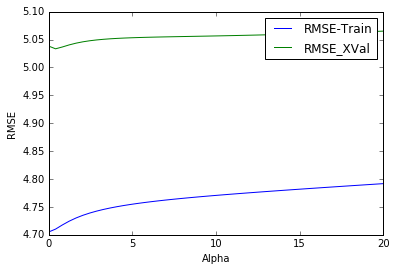

In [78]:
alpha_hunter(X_train,y_train,np.linspace(0.01,20,50),Ridge,5)

# 1d
Finally, using the best alpha value, run the model on the set-aside data. Discuss your observation and conculsions

In [79]:
ridge = Ridge(fit_intercept=True,alpha=0.418)
ridge.fit(X_test,y_test)
p = ridge.predict(X_test)
err = p-y_test
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))
        
      
#5-fold cross-validation
kf = KFold(len(X_train),n_folds=5)
xval_err = 0
for train,test in kf:
    ridge.fit(X_train[train],y_train[train])
    p = ridge.predict(X_train[test])
    e = p-y_train[test]
    xval_err += np.dot(e,e)
    rmse_5cv = np.sqrt(xval_err/len(X_train))
    
print "    Train",'\t\t' "      CV"
print rmse_train, '\t\t', rmse_5cv

    Train 		      CV
4.22018226875 		5.03331993315


From the above results, we can see that the rmse on the training data was less than the rmse on the testing using cross-validation by about 0.9 The lowest rmse that we obtained was using an alpha of 0.418.

In [80]:
#Lasso Regression

In [81]:
from sklearn.linear_model import Lasso

alpha	 rmse_train	 rmse_kcv
0.010	 4.7092	 	  5.0376
0.418	 4.8956	 	  5.1429
0.826	 5.0696	 	  5.3081
1.234	 5.3453	 	  5.5886
1.642	 5.5352	 	  5.7633
2.050	 5.6723	 	  5.8956
2.458	 5.7703	 	  5.9838
2.866	 5.8519	 	  6.0608
3.274	 5.9384	 	  6.1455
3.682	 6.0320	 	  6.2120
4.090	 6.1302	 	  6.2827
4.498	 6.1544	 	  6.3136
4.906	 6.1693	 	  6.3302
5.313	 6.1855	 	  6.3462
5.721	 6.2029	 	  6.3635
6.129	 6.2216	 	  6.3820
6.537	 6.2414	 	  6.4018
6.945	 6.2626	 	  6.4228
7.353	 6.2849	 	  6.4451
7.761	 6.3083	 	  6.4686
8.169	 6.3330	 	  6.4918
8.577	 6.3588	 	  6.5119
8.985	 6.3858	 	  6.5331
9.393	 6.4139	 	  6.5553
9.801	 6.4431	 	  6.5785
10.209	 6.4734	 	  6.6028
10.617	 6.4996	 	  6.6226
11.025	 6.5182	 	  6.6415
11.433	 6.5376	 	  6.6611
11.841	 6.5576	 	  6.6813
12.249	 6.5782	 	  6.7022
12.657	 6.5995	 	  6.7237
13.065	 6.6214	 	  6.7457
13.473	 6.6439	 	  6.7683
13.881	 6.6670	 	  6.7915
14.289	 6.6908	 	  6.8154
14.697	 6.7151	 	  6.8398
15.104	 6.7400	 	  6.8649
15.512	 6

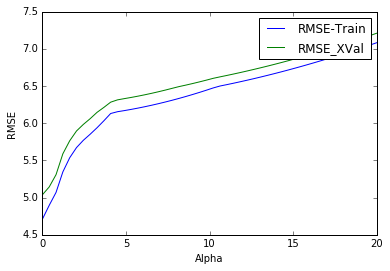

In [82]:
alpha_hunter(X_train,y_train,np.linspace(0.01,20,50),Lasso,5)

In [83]:
lasso = Lasso(fit_intercept=True,alpha=0.010)
lasso.fit(X_test,y_test)
p = lasso.predict(X_test)
err = p-y_test
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))
        
      
#5-fold cross-validation
kf = KFold(len(X_train),n_folds=5)
xval_err = 0
for train,test in kf:
    lasso.fit(X_train[train],y_train[train])
    p = lasso.predict(X_train[test])
    e = p-y_train[test]
    xval_err += np.dot(e,e)
    rmse_5cv = np.sqrt(xval_err/len(X_train))
    
print "    Train",'\t\t' "      CV"
print rmse_train, '\t\t', rmse_5cv

    Train 		      CV
4.13259439363 		5.03757062182


From the above results, we can see that we obtained an rmse on the cross-validation lasso model of 5.0376, which is higher than the rmse on cross-validation that we obtained with the ridge model. The optimal level of alpha for lasso was 0.010, which was lower than the optimal alpha for ridge.

# 1e

    Next, perform regression using Stochastic Gradient Descent for regression. For this part, you should use the SGDRegessor module from sklearn.linear_model. Again, start with creating randomized 80%-20% train-test split. SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values). Using the best parameters, apply the model to the set-aside test data. Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a summary of your findings from the above experiments.


In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()

In [86]:
from sklearn.datasets import load_boston      
#This is play data to build the function. We will replace with the data from above later.
boston = load_boston()
# In order to do multiple regression we need to add a column of 1s for x0
x = np.array([np.concatenate((v,[1])) for v in boston.data])
y = boston.target

In [87]:
#Creating 80% train and 20% test splits
#20/80 split:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [88]:
X_train

array([[  4.41780000e-01,   0.00000000e+00,   6.20000000e+00, ...,
          3.80340000e+02,   3.76000000e+00,   1.00000000e+00],
       [  5.37200000e-02,   0.00000000e+00,   1.39200000e+01, ...,
          3.92850000e+02,   7.39000000e+00,   1.00000000e+00],
       [  1.58603000e+01,   0.00000000e+00,   1.81000000e+01, ...,
          7.68000000e+00,   2.43900000e+01,   1.00000000e+00],
       ..., 
       [  4.56000000e-02,   0.00000000e+00,   1.38900000e+01, ...,
          3.92800000e+02,   1.35100000e+01,   1.00000000e+00],
       [  5.29305000e+00,   0.00000000e+00,   1.81000000e+01, ...,
          3.78380000e+02,   1.87600000e+01,   1.00000000e+00],
       [  1.25179000e+00,   0.00000000e+00,   8.14000000e+00, ...,
          3.76570000e+02,   2.10200000e+01,   1.00000000e+00]])

In [89]:
y_train

array([ 31.5,  27.1,   8.3,  13.6,   8.8,  22.5,   7.5,  28.6,  50. ,
        11.5,  13.5,  24.4,  36.2,  21.4,  18.5,  22.6,  24.8,  19.3,
        29.8,  16.4,   8.4,  24.7,  20.1,  13.1,  35.2,  33.8,  20.3,
        10.2,  22. ,  21.2,  24.2,  29. ,  22.7,  21.8,  34.9,  25.2,
        20.9,  19.4,  20. ,  14. ,  30.1,  33.1,  20.6,  22.6,  33.4,
        20.1,  10.5,  15.6,  16.8,  22.6,  34.6,  19.8,  17.8,  22. ,
        17.4,  15.4,  16.7,  22.6,  15.1,  21.4,  15.3,   7.4,  13.9,
        17.6,  25. ,  46.7,  17.1,  23.1,  18.7,  21.9,  18.9,  26.7,
        22.3,  25. ,  14.6,  42.8,  17.3,  22.2,  36.5,  22.8,  19.9,
        36.2,  50. ,  25. ,  22.2,  17.5,  23.9,  19.6,  24.7,  28.4,
         8.7,  21.7,  20. ,  19.9,  24.5,  15. ,   7. ,  15.2,  20.4,
         8.5,  17.1,  30.1,  15. ,  19.4,  23.2,  17. ,  18.9,  50. ,
        25. ,  46. ,   7.2,  17.8,  35.1,  24.3,   5. ,  16.6,  21.8,
        28.5,  22. ,  20.3,  21.7,  26.4,  30.7,  50. ,  17.2,  26.6,
        21. ,  23.4,

In [90]:
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [91]:
x_s = scaler.transform(X_train)
xt_s = scaler.transform(X_test)

# 1e
    First, do grid search, comparing combinations of two penalty parameters ('l2','l1'), and different values of alpha. Then, using the best parameters, apply the model to the set-aside test data

In [92]:
from sklearn.grid_search import GridSearchCV

In [93]:
SGD = SGDRegressor()

In [94]:
parameters = {
    'alpha': np.linspace(0.0001,0.01,100),
    'penalty': ['l2','l1'],
    'n_iter' : [1,10,15,20]
}

In [95]:
gs = GridSearchCV(SGD,parameters,verbose=1,cv=5)

In [96]:
gs.best_params_,gs.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

#Then, using the best parameters, apply the model to the set-aside test data

In [97]:
SGD2 = SGDRegressor(alpha=0.0069000000000000008,penalty='l2',n_iter=10)

In [98]:
SGD2.fit(xt_s,y_test)   #here, xt_s is the standardized test data

SGDRegressor(alpha=0.0069, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=10, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

# 1e
Finally, perform model selection to find the best 'l1 ratio' parameter using SGDRegressor with the 'elasticnet' penalty parameter.

In [99]:
sgdreg = SGDRegressor()

In [100]:
sgdreg.get_params()

{'alpha': 0.0001,
 'average': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'n_iter': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'verbose': 0,
 'warm_start': False}

In [101]:
parameters = {
    'l1_ratio':np.linspace(0,1,100)
}

In [102]:
gs = GridSearchCV(SGD,parameters,verbose=1,cv=5)

In [103]:
gs.best_params_,gs.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

Using the best mixing l1_ratio, apply the Elastic Net model to the set-aside test data

In [104]:
SGD3 = SGDRegressor(l1_ratio=)   #Get the l1_ratio from the step above

SyntaxError: invalid syntax (<ipython-input-104-4cc094f9b63a>, line 1)

In [105]:
SGD3.fit(xt_s,y_test) 

NameError: name 'SGD3' is not defined

#Provide a summary of your findings from the above experiments

# Problem #2
Automatic Document Clustering [Dataset: newsgroups5.zip]
For this problem you will use a different subset of the 20 Newsgroup data set that you used in Assignment 2  (see the description of the full dataset). The subset for this assignment includes 2,500 documents (newsgroup posts), each belonging to one of 5 categories windows (0), crypt (1), christian (2), hockey (3), forsale (4). The documents are represented by 9328 terms (stems). The dictionary (vocabulary) for the data set is given in the file "terms.txt" and the full term-by-document matrix is given in "matrix.txt" (comma separated values). The actual category labels for the documents are provided in the file "classes.txt". Your goal in this assignment is to perform clustering on the documents and compare the clusters to the actual categories.
Your tasks in this problem are the following [Note: for the clustering part of this assignment you should use the kMeans module from Ch. 10 of MLA (use the version provided here as it includes some corrections to the book version). You may also use Pandas and other modules from scikit-learn that you may need for preprocessing or evaluation.]


In [1]:
import numpy as np
from numpy import linalg as la
import pandas as pd
from sklearn.cross_validation import KFold 

In [2]:
cd /Users/zacklarsen/Desktop/CSC 478/HW/HW #3/newsgroups5

/Users/zacklarsen/Desktop/CSC 478/HW/HW #3/newsgroups5


# 2a
Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function.

In [ ]:
These are similarity functions, but we need to take one minus the similarity for the distance

In [3]:
def cosSim(x,y):
    xT = x.T
    num = xT.dot(y)     
    denom = la.norm(x)*la.norm(y)
    return 0.5+0.5*(num/denom)

In [4]:
from math import*

def square_rooted(x):
    return round(sqrt(sum([a*a for a in x])),3)

def cosine_similarity(x,y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)



In [5]:
print cosine_similarity([3, 45, 7, 2], [2, 54, 13, 15]) 

0.972


In [6]:
def cosSim2(x,y):
    x_norm = np.array([np.linalg.norm(x[i]) for i in range(len(x))])
    y_norm = np.linalg.norm(y)
    sims = np.dot(x,y)/(x_norm * x_norm)
    dists = 1 - sims
    return dists

# 2b
Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, split the data set (the document x term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. The 20% portion must be a random subset.

In [7]:
vocab = np.genfromtxt("terms.txt",delimiter="\t",dtype=str)

In [8]:
labels = np.genfromtxt("classes.txt",delimiter=" ",dtype=int,skip_header=1)

In [9]:
print vocab
vocab.shape

['aa' 'aargh' 'aaron' ..., 'zw' 'zx' 'zz']


(9328,)

In [10]:
print labels
labels.shape

[[   0    0]
 [   1    1]
 [   2    1]
 ..., 
 [2497    3]
 [2498    4]
 [2499    2]]


(2500, 2)

In [11]:
TD = np.genfromtxt("matrix.txt",delimiter=",",dtype=float)
DT = TD.T

In [12]:
DT

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [13]:
print TD.shape
print DT.shape

(9328, 2500)
(2500, 9328)


# Note:
We can add in the categorical labels for each document in the DT matrix because this is unsupervised learning

In [14]:
print DT.shape, labels.shape

(2500, 9328) (2500, 2)


# Note:
We need to split the data into train, test with 80% train, 20% test

In [15]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(DT, labels, test_size=0.2, random_state=33)

In [16]:
print X_train,X_train.shape,X_test.shape

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] (2000, 9328) (500, 9328)


In [17]:
print y_train, y_train.shape,y_test.shape

[[1289    4]
 [ 596    0]
 [1935    4]
 ..., 
 [ 578    2]
 [1752    0]
 [2439    1]] (2000, 2) (500, 2)


In [18]:
print X_train[1]

[ 0.  0.  0. ...,  0.  0.  0.]


In [19]:
print y_train[1]

[596   0]


In [20]:
DLT_train = np.array([np.concatenate((X_train[i],[y_train[i][1]])) for i in range(len(X_train))])

In [21]:
print DLT_train, DLT_train.shape

[[ 0.  0.  0. ...,  0.  0.  4.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  4.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  2.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]] (2000, 9329)


In [22]:
DLT_test = np.array([np.concatenate((X_test[i],[y_test[i][1]])) for i in range(len(X_test))])

In [23]:
print DLT_test,DLT_test.shape

[[ 0.  0.  0. ...,  0.  0.  2.]
 [ 0.  0.  0. ...,  0.  0.  2.]
 [ 0.  0.  0. ...,  0.  0.  4.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  2.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  3.]] (500, 9329)


# 2c
As in the case of Assignment 2, transform the term-frequencies (which is the document-term matrix, or DT) to tfxidf values. Be sure to maintain DF values for each of the terms in the dictionary.

In [24]:
DF = np.array([(X_train!=0).sum(0)])
DF.shape

(1, 9328)

In [25]:
DF

array([[ 7,  4, 17, ...,  2,  1,  2]])

In [26]:
numTerms=X_train.shape[1]
NDocs = len(X_train[:,0])

In [27]:
print numTerms, NDocs

9328 2000


In [28]:
# Create a matrix with all entries = NDocs
NMatrix=np.ones(np.shape(X_train), dtype=float)*NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print NMatrix

[[ 2000.  2000.  2000. ...,  2000.  2000.  2000.]
 [ 2000.  2000.  2000. ...,  2000.  2000.  2000.]
 [ 2000.  2000.  2000. ...,  2000.  2000.  2000.]
 ..., 
 [ 2000.  2000.  2000. ...,  2000.  2000.  2000.]
 [ 2000.  2000.  2000. ...,  2000.  2000.  2000.]
 [ 2000.  2000.  2000. ...,  2000.  2000.  2000.]]


In [29]:
NMatrix.shape

(2000, 9328)

In [30]:
IDF = np.log2(np.divide(NMatrix, DF))

In [31]:
IDF

array([[  8.16,   8.97,   6.88, ...,   9.97,  10.97,   9.97],
       [  8.16,   8.97,   6.88, ...,   9.97,  10.97,   9.97],
       [  8.16,   8.97,   6.88, ...,   9.97,  10.97,   9.97],
       ..., 
       [  8.16,   8.97,   6.88, ...,   9.97,  10.97,   9.97],
       [  8.16,   8.97,   6.88, ...,   9.97,  10.97,   9.97],
       [  8.16,   8.97,   6.88, ...,   9.97,  10.97,   9.97]])

In [32]:
print X_train.shape
print IDF.shape

(2000, 9328)
(2000, 9328)


In [33]:
#Compute the TF * IDF values
X_train_tfidf = X_train * IDF

In [34]:
X_train_tfidf.shape

(2000, 9328)

In [35]:
pd.set_option("display.precision", 2)
X_train_tfidf

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [36]:
print X_train_tfidf.shape

(2000, 9328)


# 2d
Perform Kmeans clustering on the training data. Write a function to display the top N terms in each cluster along with the cluster DF values for each term, percentage of docs in the cluster in which the terms appear, and the size of the cluster. Sort the terms in decreasing order of the DF percentage. [Extra Credit: use your favorite third party tool, ideally with a Python based API, to create a word cloud for each cluster based on the in-cluster DF values.]

In [37]:
from numpy import *
def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

In [38]:
def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = zeros((k,n), dtype=float)
    for j in range(n): #create random cluster centers
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k)
    return centroids 

In [39]:
randCent(X_train,5)

array([[  0.95,   0.91,  34.65, ...,   1.89,   0.58,   2.67],
       [  0.49,   0.3 ,  26.44, ...,   0.59,   0.4 ,   3.09],
       [  0.5 ,   0.28,  12.33, ...,   1.42,   0.51,   1.18],
       [  0.73,   0.72,  32.87, ...,   0.22,   0.66,   3.99],
       [  0.81,   0.16,  10.33, ...,   1.28,   0.07,   2.8 ]])

# Using CH 10 MLIA Kmeans

In [40]:
def kMeans(dataSet, k, distMeas, createCent):
    m = shape(dataSet)[0]
    clusterAssment = zeros((m,2))#create mat to assign data points 
                                      #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:]) #Distance between centroid and each data point
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        # print centroids
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0]==cent)[0]] #get all the point in this cluster - Note: this was incorrect in the original distribution.
            if(len(ptsInClust)!=0):
                centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean - Note condition was added 10/28/2013
    return centroids, clusterAssment

# 2d
Perform kmeans clustering on the training data

In [41]:
euclid_centroids, euclid_clusters = kMeans(X_train,5, distMeas=distEclud, createCent=randCent)    

In [42]:
print euclid_centroids, euclid_centroids.shape

[[ 0.    0.    0.04 ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.5   0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]] (5, 9328)


In [43]:
print euclid_clusters, euclid_clusters.shape

[[    0.      52.74]
 [    0.      49.3 ]
 [    0.      94.89]
 ..., 
 [    0.    2109.56]
 [    0.      77.52]
 [    0.      59.79]] (2000, 2)


In [44]:
for i in euclid_clusters:
    print "cluster assignment:",i[0],"  ","error, or distance from cluster centroid to current point:",i[1]

cluster assignment: 0.0    error, or distance from cluster centroid to current point: 52.7356849888
cluster assignment: 0.0    error, or distance from cluster centroid to current point: 49.3033880981
cluster assignment: 0.0    error, or distance from cluster centroid to current point: 94.892154397
cluster assignment: 0.0    error, or distance from cluster centroid to current point: 48.7246518895
cluster assignment: 0.0    error, or distance from cluster centroid to current point: 92.1388946177
cluster assignment: 0.0    error, or distance from cluster centroid to current point: 860.216126313
cluster assignment: 0.0    error, or distance from cluster centroid to current point: 193.193057105
cluster assignment: 0.0    error, or distance from cluster centroid to current point: 580.343508459
cluster assignment: 0.0    error, or distance from cluster centroid to current point: 36.3114121703
cluster assignment: 0.0    error, or distance from cluster centroid to current point: 43.6434081583
c

In [45]:
newC = ravel(euclid_clusters.T[0])
newC = newC.astype(int)
print newC

[0 0 0 ..., 0 0 0]


In [46]:
print euclid_centroids

[[ 0.    0.    0.04 ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.5   0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]]


Write a function to display the top N terms in each cluster along with the cluster DF values for each term, percentage of docs in the cluster in which the terms appear, and the size of the cluster. Sort the terms in decreasing order of the DF percentage.

In [92]:
vocab = pd.DataFrame(vocab)

def TOPN(euclid_clusters,N):
    
    ecDF  = pd.DataFrame(euclid_clusters)     #Here, we are creating a dictionary of lists containing the indices
    cluster_indices = dict()                 #of the clusters from euclid_clusters that we will use later to 
    for x in range(N):                      #construct a dataframe of  the original X_train data, split by clusters
        list = []
        for i,row in ecDF[ecDF[0]==x].iterrows():
            list.append(i)
        cluster_indices[x] = list 
     
    
    #print len(cluster_indices[2])   #This gives us the size of cluster 2
            
    #Here, we are creating a list, filling it with a list of indices corresponding to the rows belonging to a given cluster,
    #and creating a dataframe object of the rows in X_train that correspond to the clusters.
    #Then, we take the dataframe, calculate the term frequencies, sort by frequency, and create a dictionary of
    #the top N terms for each cluster N
    newlist = []     

    for i in range(5):
        newlist.append(X_train[cluster_indices[i]])  

    term_dict = {}
    
    for i in range(N):
        newDF = pd.DataFrame(newlist[i])           #This newDF is a dataframe of the rows in X_train for cluster i
        TOPN = pd.DataFrame([(newDF!=0).sum(0)])
        TOPN = TOPN.T
        term_freq = pd.concat([TOPN, vocab], axis=1)      #Merge TOPN with vocab
        term_freq.columns=['frequency','term']
        term_freq = term_freq.sort_values('frequency',ascending=0)  #Sort by frequency
        TOPNterms = term_freq[:N]
        terms = TOPNterms['term'] #This displays the terms, their indices, and their frequencies   
        #print terms
    
        term_list = []
        for k in terms:
            term_list.append(k) 

        #print term_list
        term_dict[i] = term_list    
    #print term_dict[0]              #term_dict[0] gives us the top N terms in cluster 0




    
    DF_values = []
    #Calculate cluster DF values for each term in each cluster:
    for i in range(5):
        newcluster = pd.DataFrame(newlist[i])        #Newlist[i] contains the X_train data for each cluster i         
        cluster_total_docs = newcluster.shape[0]    #This is the total number of documents in the cluster
    

        topNterms = term_dict[i]  #top N terms in cluster i
        
        for term in topNterms:
            
            termindex = vocab[vocab[0] == term].index.tolist() #This gives us the column in the X_train that contains the term
            subject = newcluster[newcluster[termindex] >  0 ]  #Here, termindex is 7895 for the term 'subject'
            subjectDF = pd.DataFrame(subject)
            clusterterm_docs = subjectDF.shape[0]   #This is the number of documents in the cluster in which the term appears
            clusterDF = clusterterm_docs/cluster_total_docs  #Calculate the percentage
            DF_values.append(clusterDF) 
    
    
      
    
    
    for i in range(N):       #Print top N terms for cluster i
        print "Top N terms in cluster",i,":", term_dict[i]
    
        print "Number of documents assigned to cluster",i,"is:",len(cluster_indices[i])   #This gives us the size of cluster 2
    
        for term in term_dict[i]:
            print "The cluster DF value for term",term,"is:", DF_values[i]



In [93]:
TOPN(euclid_clusters,5)

Top N terms in cluster 0 : ['subject', 'write', 'on', 'articl', 'know']
Number of documents assigned to cluster 0 is: 1994
The cluster DF value for term subject is: 1
The cluster DF value for term write is: 1
The cluster DF value for term on is: 1
The cluster DF value for term articl is: 1
The cluster DF value for term know is: 1
Top N terms in cluster 1 : ['pmfq', 'bxn', 'mkn', 'romanbmp', 'ml']
Number of documents assigned to cluster 1 is: 2
The cluster DF value for term pmfq is: 1
The cluster DF value for term bxn is: 1
The cluster DF value for term mkn is: 1
The cluster DF value for term romanbmp is: 1
The cluster DF value for term ml is: 1
Top N terms in cluster 2 : ['romanbmp', 'pwiseman', 'cliff', 'bj', 'asf']
Number of documents assigned to cluster 2 is: 1
The cluster DF value for term romanbmp is: 1
The cluster DF value for term pwiseman is: 1
The cluster DF value for term cliff is: 1
The cluster DF value for term bj is: 1
The cluster DF value for term asf is: 1
Top N terms in

# Extra Credit: 
use your favorite third party tool, ideally with a Python based API, to create a word cloud for each cluster based on the in-cluster DF values.

# 2e
Using the cluster assignments from Kmeans clustering, compare your 5 clusters to the 5 pre-assigned classes by computing the Completeness and Homogeneity values.

In [94]:
from sklearn.metrics import completeness_score, homogeneity_score

In [95]:
euclid_clusters 

array([[    0.  ,    52.74],
       [    0.  ,    49.3 ],
       [    0.  ,    94.89],
       ..., 
       [    0.  ,  2109.56],
       [    0.  ,    77.52],
       [    0.  ,    59.79]])

In [96]:
euclid_clusters[:,0]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [97]:
t = y_train[:,1]

In [98]:
print completeness_score(t,euclid_clusters[:,0])  

0.195469783928


In [99]:
print homogeneity_score(t,euclid_clusters[:,0])

0.00296523048991


# 2f
Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate cluster. Your categorization should be based on Cosine similarity between each test document and each cluster centroids. Present your results in a separate file containing the obtained cluster label for each test document as well as Cosine similarities between each test document and each of the 5 clusters.


#For this part, we are essentially using classification, but using the clustroid-defined classes, not the original labels. There is no need to create labels.

In [105]:
X_test

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [101]:
y_test

array([[1590,    2],
       [ 277,    2],
       [2297,    4],
       [1739,    0],
       [ 511,    4],
       [  96,    1],
       [2259,    3],
       [1850,    2],
       [1615,    2],
       [1467,    2],
       [ 257,    2],
       [ 237,    4],
       [1638,    0],
       [1098,    4],
       [1412,    0],
       [1701,    0],
       [1210,    1],
       [1355,    2],
       [1996,    2],
       [1981,    0],
       [1333,    2],
       [2170,    1],
       [2470,    4],
       [ 994,    0],
       [2131,    1],
       [  85,    0],
       [ 747,    3],
       [ 828,    3],
       [1318,    4],
       [2103,    1],
       [ 547,    4],
       [1120,    2],
       [1882,    1],
       [ 393,    4],
       [ 126,    0],
       [1890,    0],
       [1508,    1],
       [ 445,    0],
       [ 763,    3],
       [1670,    3],
       [2396,    2],
       [ 380,    3],
       [ 675,    0],
       [2143,    2],
       [ 734,    1],
       [  16,    0],
       [1266,    3],
       [1067,

In [102]:
DLT_test

array([[ 0.,  0.,  0., ...,  0.,  0.,  2.],
       [ 0.,  0.,  0., ...,  0.,  0.,  2.],
       [ 0.,  0.,  0., ...,  0.,  0.,  4.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  2.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  3.]])

In [103]:
class_labels = euclid_clusters

In [104]:
class_labels

array([[    0.  ,    52.74],
       [    0.  ,    49.3 ],
       [    0.  ,    94.89],
       ..., 
       [    0.  ,  2109.56],
       [    0.  ,    77.52],
       [    0.  ,    59.79]])

In [ ]:
#Cosine similarity between each test document and each of the cluster centroids

In [108]:
euclid_centroids

array([[ 0.  ,  0.  ,  0.04, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.5 ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [114]:
distance = cosSim(euclid_centroids.T,X_test.T)

In [115]:
distance

array([[ 0.5,  0.5,  0.5, ...,  0.5,  0.5,  0.5],
       [ 0.5,  0.5,  0.5, ...,  0.5,  0.5,  0.5],
       [ 0.5,  0.5,  0.5, ...,  0.5,  0.5,  0.5],
       [ 0.5,  0.5,  0.5, ...,  0.5,  0.5,  0.5],
       [ 0.5,  0.5,  0.5, ...,  0.5,  0.5,  0.5]])

Write the results out to a file containing the cluster label for each test document and the cosine similarities between each test document and each of the 5 clusters